In [1]:
import numpy as np

In [2]:
A = np.array([[0.6, 0.3, 0.1], [0.5, 0.3, 0.2], [0.2, 0.1, 0.7]])

In [3]:
A @ A ### @ is used for matrix multiplication 
## we do not use A * A for matrix multiplication

array([[0.53, 0.28, 0.19],
       [0.49, 0.26, 0.25],
       [0.31, 0.16, 0.53]])

In [4]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [5]:
def power(A, n):
    
    L = np.eye(3)
    for i in range(n+1):
        L = L @ A
    return L

In [6]:
power(A, 1000) #### This guy is called stationary dist.

array([[0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381]])

In [7]:
states = [0,1,2]
dict_ = {0:"Rainy", 1:"Cloudy", 2:"Sunny"}

In [8]:
np.random.choice(states, )

1

In [9]:
A[0] ### transition probabilities from state 0 to other states....

array([0.6, 0.3, 0.1])

In [10]:
def return_chain(length = 100, states = states, transition_probs = A):
    initial_state = np.random.choice(states)
    chain = [initial_state]
    for i in range(length):
        current_state = chain[-1]
        next_state = np.random.choice(states, p = transition_probs[current_state])        
        chain.append(next_state)
    return chain

In [11]:
chain = return_chain(6000000)[10000:]

In [12]:
np.bincount(chain) ### bincount function actually counts all occurencess and puts them into 3 bins.

array([2712461, 1425034, 1852506])

In [13]:
np.bincount(chain)/len(chain)

array([0.45283148, 0.23790213, 0.30926639])

In [2]:
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [3]:
dist = stats.rayleigh(loc = 0, scale = 1)

In [4]:
sample = dist.rvs(size = 100000)

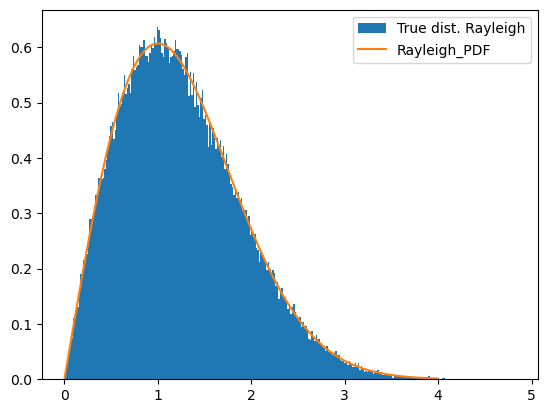

In [8]:
f = lambda x: (x)*np.exp(-x**2/2)
plt.hist(sample, density =True, bins = 300, label = "True dist. Rayleigh");
plt.plot(np.arange(0, 4, 0.01),[f(i) for i in np.arange(0, 4, 0.01)], label = "Rayleigh_PDF")
plt.legend()
plt.show()

In [20]:
### For our proposal distribution we have the following choices
## 1) Chi^2
## 2) Gamma, (exponential family)
## 3) Even Normal distribution is acceptable

In [9]:
### Our aim is to come up with a Markov Chain {X_1, X_2, ..., X_n}
## Rayleigh
## σ = 1
f = lambda x: (x)*np.exp(-x**2/2)

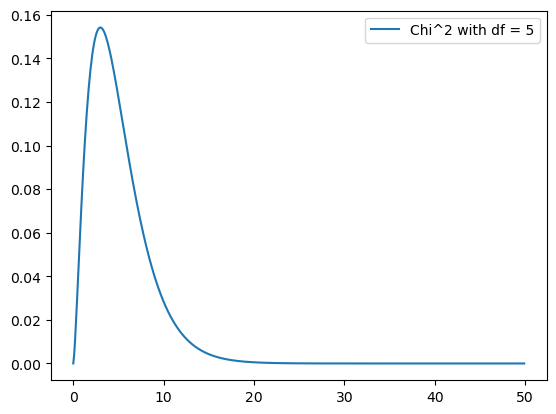

In [13]:
plt.plot(np.arange(0, 50, 0.1),[stats.chi2(5).pdf(i) for i in np.arange(0, 50, 0.1)], label = "Chi^2 with df = 5")
plt.legend()
plt.show()

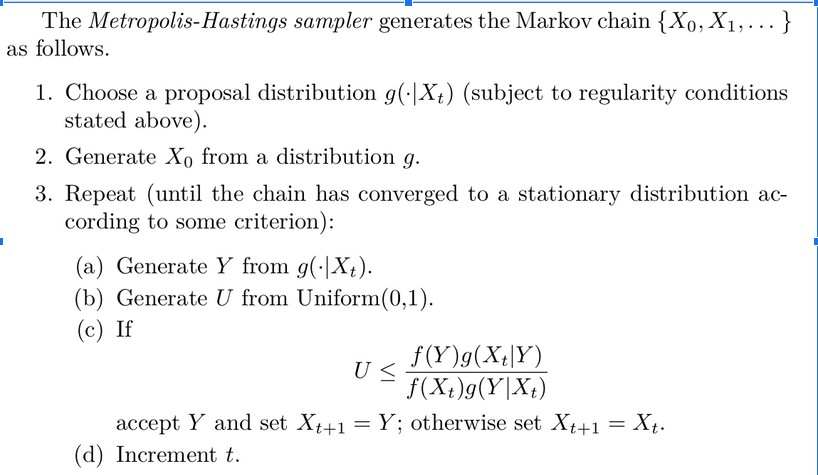

In [21]:
f = lambda x: (x)*np.exp(-x**2/2)  ##pdf of Rayleigh dist.
chain  = [1]
acceptance_ratio = []
from tqdm import tqdm
for i in tqdm(range(100000)):
    Y = stats.chi2(chain[-1]).rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.chi2(Y).pdf(chain[-1]))/(f(chain[-1])*stats.chi2(chain[-1]).pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acceptance_ratio.append(1)
    else:
        chain.append(chain[-1])

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [03:49<00:00, 434.86it/s]


In [23]:
len(acceptance_ratio)/(len(chain) -1)  #### This chain is pretty in effiient.

0.34691

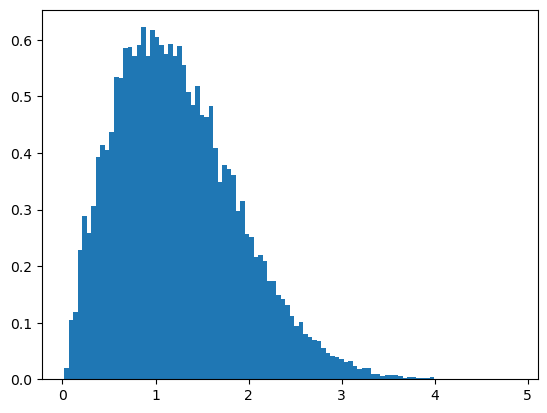

In [24]:
plt.hist(chain[500:], bins =100, density = True);

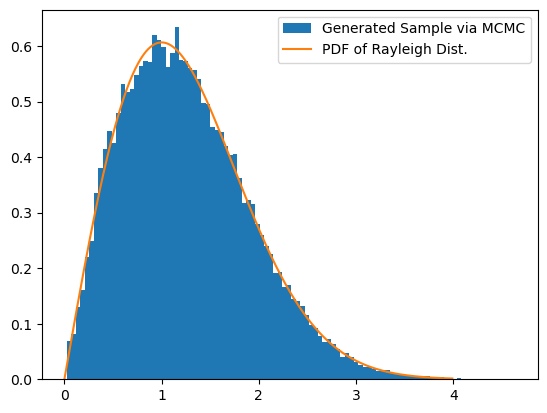

In [36]:
plt.hist(chain[500:], density =True, bins = 100, label = "Generated Sample via MCMC");
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "PDF of Rayleigh Dist.")
plt.legend()
plt.show()

In [28]:
import tqdm

In [29]:
from tqdm import tqdm

## Gamma as proposal distribution

In [28]:
chain  = [1]
acc_rat = []
for i in tqdm(range(100000)):
    proposal_dist = stats.gamma(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.gamma(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acc_rat.append(1)
    else:
        chain.append(chain[-1])

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:43<00:00, 612.71it/s]


In [29]:
sum(acc_rat)/(len(chain)-1)

0.47665

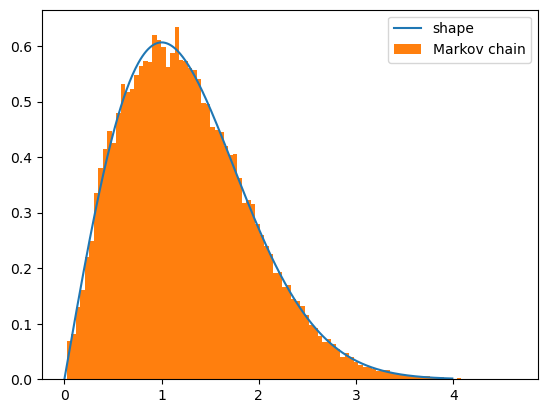

In [35]:
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "shape")
plt.hist(chain[500:], bins =100, density = True, label = "Markov chain");
plt.legend()
plt.show()

In [44]:
chain  = [1]
acc_rat = []
for i in tqdm(range(100000)):
    proposal_dist = stats.norm(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.norm(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)
        acc_rat.append(1)
    else:
        chain.append(chain[-1])

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:58<00:00, 558.96it/s]


In [47]:
sum(acc_rat)/(len(chain)-1)

0.58267

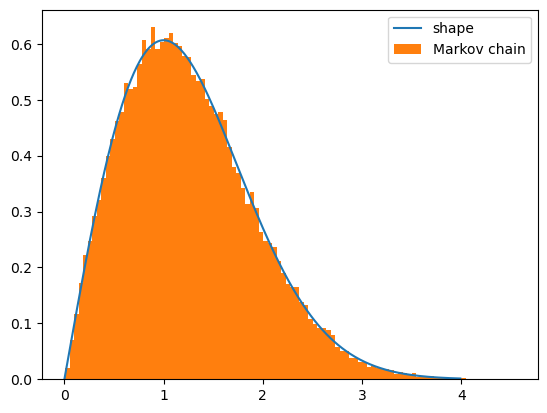

In [48]:
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "shape")
plt.hist(chain[500:], bins =100, density = True, label = "Markov chain");
plt.legend()
plt.show()

In [51]:
## Our distribution
pdf = lambda x: stats.chi2(10).pdf(x)

###  We would like to do metropolis sample (not Hasting, because the proposed distribution is symmetric $x<->\mu$ (normal distribution))

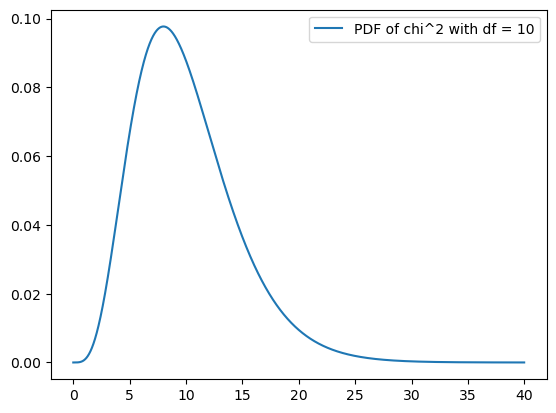

In [59]:
plt.plot(np.arange(0, 40, 0.01),pdf(np.arange(0, 40, 0.01)), label = "PDF of chi^2 with df = 10")
plt.legend()
plt.show()


In [82]:
chain  = [1]
acc_rat = []
pdf = lambda x: stats.chi2(10).pdf(x)
for i in tqdm(range(10000)):
    proposal_dist = stats.norm(chain[-1], 6)
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = pdf(Y)/pdf(chain[-1])
    if U <=  ratio:
        chain.append(Y)
        acc_rat.append(1)
    else:
        chain.append(chain[-1])

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 423.63it/s]


In [83]:
sum(acc_rat)/(len(chain)-1)
### Remember that high acceptance rate is not always good!!!!!!, 
## this means you are accepting everything from the proposed distribution
##Also pretty low acceptance rate means that your chain is really inefficient so you should keepn mind this trade-off always
## in mind!!!!

0.6009

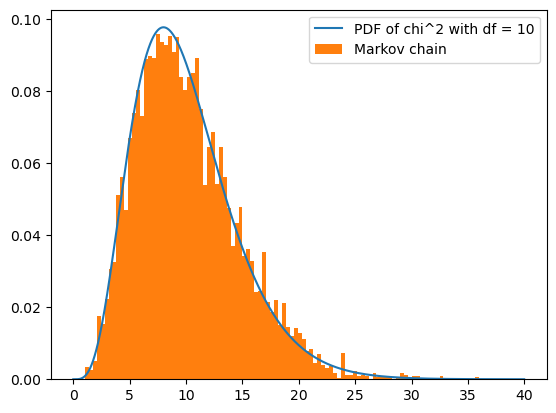

In [85]:
plt.plot(np.arange(0, 40, 0.01),pdf(np.arange(0, 40, 0.01)), label = "PDF of chi^2 with df = 10")
plt.hist(chain[500:], bins =100, density = True, label = "Markov chain");
plt.legend()
plt.show()

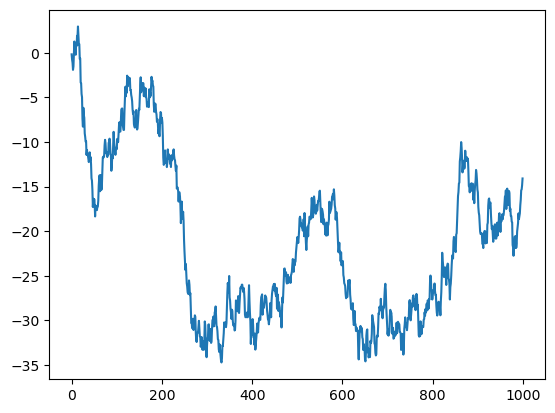

In [69]:
Z = np.random.randn(1000)
RW = np.cumsum(Z)
plt.plot(RW)
###This dude is a random walk